# Assignment # 01: Data Preprocessing and Visualization

# CS471: Machine Learning
### BESE-8 AB
### Instructors: Prof. Dr. Faisal Shafait, Dr. Muhammad Muneeb Ullah
#### Due Date: March 18, 2020

### Introduction

The Novel Coronavirus (COVID19) which causes respiratory illnesss was first detected in Wuhan, China. Since the disease is contagious, it has spread all over the world due to the high number of tourism and business visits to / from China. As you all are very well aware, COVID19 has been labelled as a global pandemic now by World Health Organization. Countries such as Italy, China, Qatar, USA, Saudi Arabia, etc, have cancelled most of the flights and a lockdown notice has been issued in Italy to avoid further wide-spread of the virus. 
Scientists all over the world are trying to drive insights from the datasets to come up with a possible prediction which will help with early diagnosis of COVID-19, estimating the spread, and the virus frequency and duration. 
Johns Hopkins University has made an excellent dashboard using the affected cases data. The dataset is made available at Kaggle and can be downloaded for the purpose of research.
For this assignment, we will use the Kaggle COVID-19 dataset (Download here: <a href="https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset" title="DATASET">DATASET</a>) and will try to learn some insights using the power of Machine Learning.
The Johns Hopkins University's web based dashboard can be accessed here:
<a href="https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6" title="Web Dashboard">Web Dashboard</a>

#### Question # 01

As you must have noticed, there are 6 files in the data you have downloaded from Kaggle.
For this question, we will use the main file `covid_19_data.csv`.
The steps to follow are given:
1. Read the data file and examine the features
2. Since the dataset is a bit sparse, clean the dataset by dropping rows which have missing points.
3. Print the initial 10 rows of the data.

In [84]:
from itertools import islice
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
path = "drive/My Drive/Colab Notebooks/covid_19_data.csv"
dataset = pd.read_csv(path)

data_iran=dataset.copy()


#dropping the rows that have missing points.
dataset.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

#printing first 10 rows.
#Head(n) prints first n rows of the dataset.If n is not given it is 5 by default
dataset.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


#### Question # 02

1. Rank the countries in the dataset in descending order according to the number of deaths.
2. Figure out the most affected provinces/states in top 3 countries with most number of Deaths.
3. Repeat the first two steps for Recovered and Confirmed cases as well.
4. Plot a bar graph for top 10 states in China and US in accordance to the death cases, and recovered cases.

Most affected provinces/states in top 3 countries with most number of Deaths are 

       SNo ObservationDate Province/State  ... Confirmed  Deaths  Recovered
5383  5384      03/14/2020          Hubei  ...   67790.0  3075.0    52960.0
5389  5390      03/14/2020         France  ...    4469.0    91.0       12.0
5409  5410      03/14/2020     Washington  ...     572.0    37.0        1.0

[3 rows x 8 columns]
provinces/states in top 3 countries with most recoveries are
 
       SNo ObservationDate  ...  Deaths Recovered
5383  5384      03/14/2020  ...  3075.0   52960.0
4733  4734      03/11/2020  ...     7.0     325.0
4559  4560      03/10/2020  ...     3.0      65.0

[3 rows x 8 columns]
provinces/states in top 3 countries with most number of confirmed cases are
 
       SNo ObservationDate  Province/State  ... Confirmed  Deaths  Recovered
5383  5384      03/14/2020           Hubei  ...   67790.0  3075.0    52960.0
5389  5390      03/14/2020          France  ...    4469.0    91.0       12

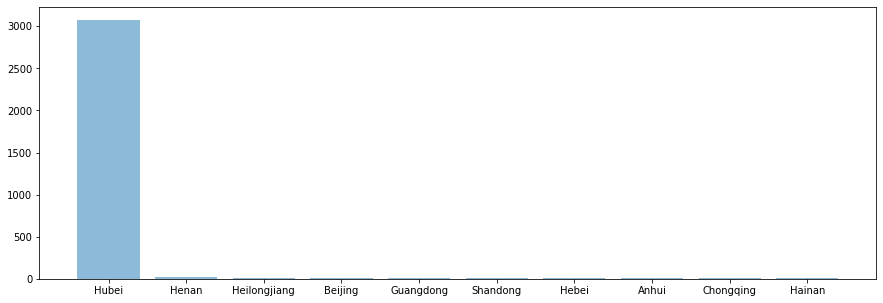

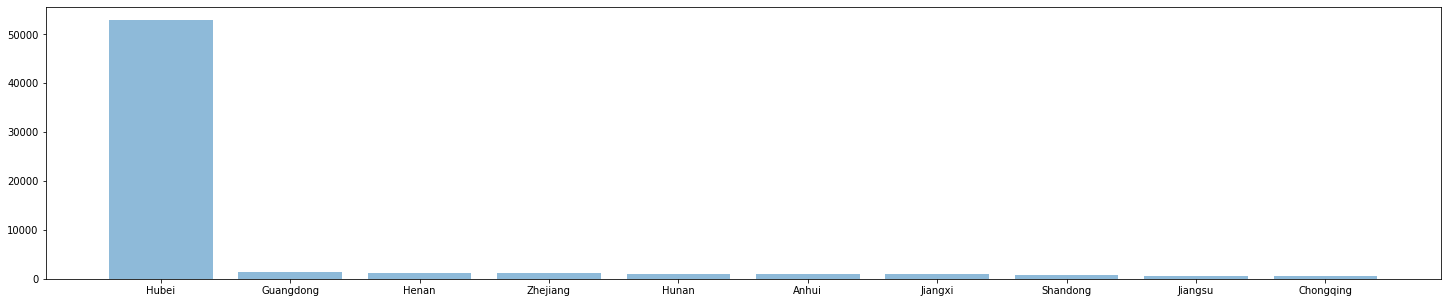

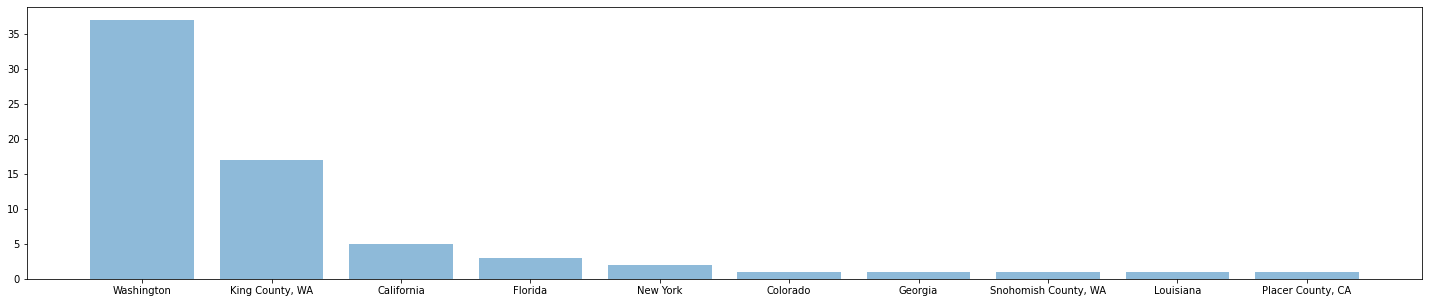

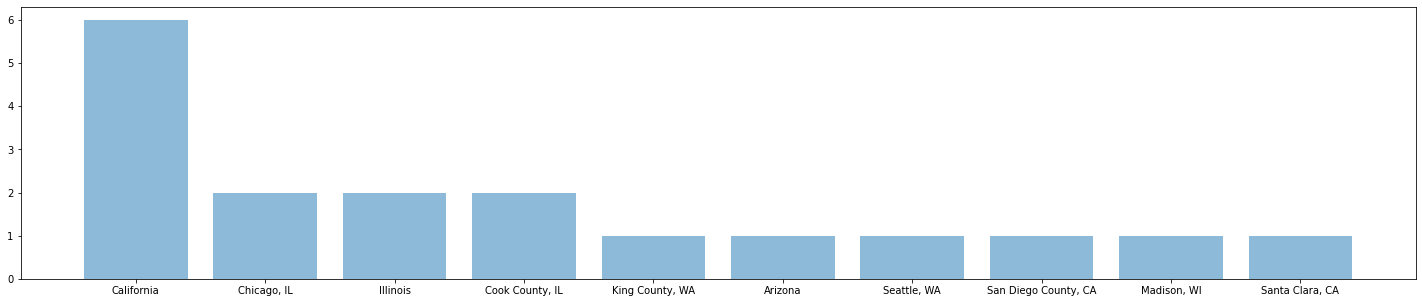

In [85]:
  import matplotlib.pyplot as plt
  data=dataset.copy()
  #task1
  deaths_descend = dataset.sort_values('Deaths', ascending=False)
  #task2
  data1=deaths_descend.drop_duplicates(subset ="Country/Region", keep='first', inplace=False)
  print("Most affected provinces/states in top 3 countries with most number of Deaths are \n")
  print(data1.head(3))
  
  #task3
  recovered = dataset.sort_values('Recovered', ascending=False)
  data2=recovered.drop_duplicates(subset ="Country/Region", keep='first', inplace=False)
  print("provinces/states in top 3 countries with most recoveries are\n ")
  print(data2.head(3))

  confirmed = dataset.sort_values('Confirmed', ascending=False)
  data3=confirmed.drop_duplicates(subset ="Country/Region", keep='first', inplace=False)
  print("provinces/states in top 3 countries with most number of confirmed cases are\n ")
  print(data3.head(3))
 
 #task4
  data2=dataset.copy()
  dataset.to_numpy()
  data2.to_numpy()
  china=(dataset['Country/Region']=='Mainland China')
  china1=dataset[china]
  china2=china1.sort_values('Deaths', ascending=False)
  china3=china1.sort_values('Recovered', ascending=False)
  china0=china2.drop_duplicates(subset ="Province/State", keep='first', inplace=False)
  china4=china3.drop_duplicates(subset ="Province/State", keep='first', inplace=False)
 
  US=(data2['Country/Region']=='US')
  US1=data2[US]
  US2=US1.sort_values('Deaths', ascending=False)
  US3=US1.sort_values('Recovered', ascending=False)
  US0=US2.drop_duplicates(subset ="Province/State", keep='first', inplace=False)
  US4=US3.drop_duplicates(subset ="Province/State", keep='first', inplace=False)
  
  plt.figure(figsize=(15,5))
  plt.bar(china0['Province/State'].head(10), china0['Deaths'].head(10), align='center', alpha=0.5)
  plt.show()
  plt.figure(figsize=(25,5))
  plt.bar(china4['Province/State'].head(10), china4['Recovered'].head(10), align='center', alpha=0.5)
  plt.show()
  plt.figure(figsize=(25,5))
  plt.bar(US0['Province/State'].head(10), US0['Deaths'].head(10), align='center', alpha=0.5)
  plt.show()
  plt.figure(figsize=(25,5))
  plt.bar(US4['Province/State'].head(10), US4['Recovered'].head(10), align='center', alpha=0.5)
  plt.show()
 

 

#### Question # 03

Since we have dates in the data, let's quantify out how the virus has spread over time and which areas are most affected by the virus. This will help us figure out if the situation is getting any better over time or not.

1. Plot the confirmed, deaths and recovered cases as line graphs with dates for US, Iran and China each.
2. Looking at the plots, explain which country has seen a surge in confirmed, and death cases?
3. Work out the death rate due to COVID-19 in these three countries.
4. By examining the plots, which country has been able to efficiently and swiftly recover the confirmed cases? Work out the recovery rate for each country (US, Iran and China) and then answer the question?

Deaths-red
Recovered-green
Confirmed-olive


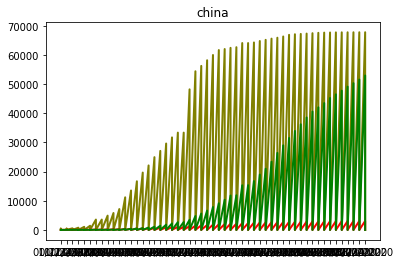

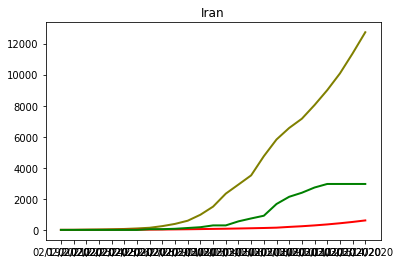

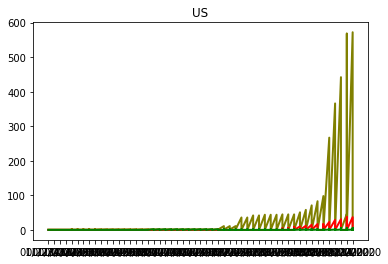

death rate for China,Iran and US is: 

1803.22 69.32 6.34


In [86]:
import matplotlib.pyplot as plt
print("Deaths-red")
print("Recovered-green")
print("Confirmed-olive")

data1.to_numpy()
#task1
#china
#print(china1)
y=china1['Confirmed']
x=china1['ObservationDate']
z=china1['Deaths']
r=china1['Recovered']
plt.plot(x,y,color='olive', linewidth=2)
plt.plot(x,z,color='red', linewidth=2)
plt.plot(x,r,color='green', linewidth=2)
plt.title('china')
plt.show()

#Iran
Iran=(data_iran['Country/Region']=='Iran')
Iran1=data_iran[Iran]
y=Iran1['Confirmed']
x=Iran1['ObservationDate']
z=Iran1['Deaths']
r=Iran1['Recovered']
plt.plot(x,y,color='olive', linewidth=2)
plt.plot(x,z,color='red', linewidth=2)
plt.plot(x,r,color='green', linewidth=2)
plt.title('Iran')
plt.show()
#us

US=(data2['Country/Region']=='US')
US1=data2[US]
y=US1['Confirmed']
x=US1['ObservationDate']
plt.title('US')
z=US1['Deaths']
r=US1['Recovered']
plt.plot(x,y,color='olive', linewidth=2)
plt.plot(x,z,color='red', linewidth=2)
plt.plot(x,r,color='green', linewidth=2)
plt.show()

#death rate
sum_china=china1['Deaths'].sum()
sum_Iran=Iran1['Deaths'].sum()
sum_US=US1['Deaths'].sum()
max_date=china1['ObservationDate'].max()
min_date=china1['ObservationDate'].min()

death_rate_china=sum_china/50
death_rate_Iran=sum_Iran/50
Death_rate_US=sum_US/50

print("death rate for China,Iran and US is: \n")
print( death_rate_china , death_rate_Iran , Death_rate_US)

#### Question # 04

In this question, we will look at another data file namely `time_series_covid_19_deaths.csv`.
In this file, time series data of death occurred due to COVID-19 in countries/states/provinces is given.

1. Read the file and examine the features.
2. Clean the dataset by dropping missing rows with data points.
3. Since you already have information for States/Provinces in US, and China with most deaths, you can use those States/Provinces and plot the number of deaths against each of the top 5 states in both China and US.

No handles with labels found to put in legend.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


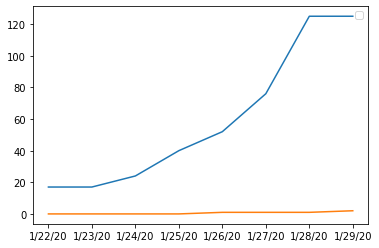

No handles with labels found to put in legend.


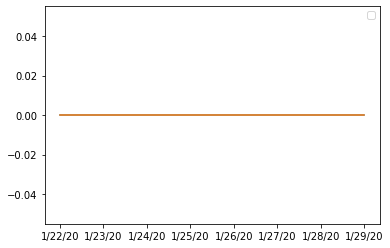

In [118]:
from itertools import islice
from google.colab import drive
import pandas as pd

#task1
drive.mount('/content/drive')
path2 = "drive/My Drive/Colab Notebooks/time_series_covid_19_deaths.csv"
dataset2 = pd.read_csv(path2)

#task2
#dropping the rows that have missing points.
dataset2.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
#dataset2
#task3
time=(dataset2['Province/State']=='Hubei')
time2=(dataset2['Province/State']=='Henan')
time3=(dataset2['Province/State']=='Beijing')

x=list(dataset2.columns.values)
dates=x[4:12]

y = dataset2[time].values[0]
death_values=y[4:12]

z1 = (dataset2[time2].values[0])
z=z1[4:12]


plt.plot(dates,death_values)
plt.plot(dates,z)
plt.legend()
plt.show()
#US
time=(dataset2['Province/State']=='California')
time2=(dataset2['Province/State']=='Arizona')

x=list(dataset2.columns.values)
dates=x[4:12]

y = dataset2[time].values[0]
death_values=y[4:12]

z1 = (dataset2[time2].values[0])
z=z1[4:12]


plt.plot(dates,death_values)
plt.plot(dates,z)
plt.legend()
plt.show()



In [0]:
dataset2.describe()

#### Question # 05

This aspect is interesting since we would get to work with Geographical Plots. You have the latitude and longitude data from the `time_series_covid_19_deaths.csv` data file. You will use that for this question.

We will use BaseMap library to plot the latitude and longitude points on the world map.
You can download BaseMap by running the following command in your terminal/command line prompt: 
```
pip3 install https://github.com/matplotlib/basemap/archive/v1.1.0.tar.gz
```

1. Once you have it installed, load up a basic world map and plot the values.
2. By visually examining, answer in which countries, the points scatter the most?

For reference and working directions with Basemap, you may take help from this video tutorial: <a href="https://www.youtube.com/watch?time_continue=114&v=XiZbrii49pI&feature=emb_title" BASEMAP >BASEMAP TUTORIAL</a>

In [0]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 25 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 1s (94.5 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 133872 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1

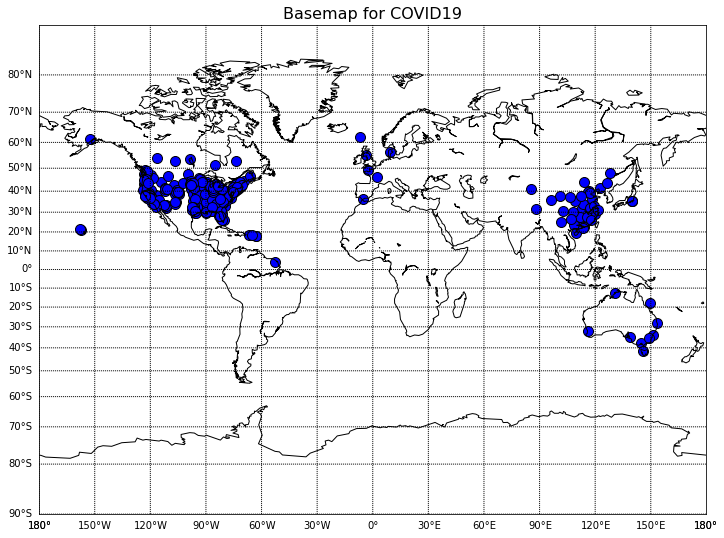

In [0]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



fig = plt.figure(figsize=(12,9))

m = Basemap(projection='mill',
           llcrnrlat = -90,
           urcrnrlat = 90,
           llcrnrlon = -180,
           urcrnrlon = 180,
           resolution = 'c')

m.drawcoastlines()
m.drawparallels(np.arange(-90,90,10),labels=[True,False,False,False])
m.drawmeridians(np.arange(-180,180,30),labels=[0,0,0,1])

latitude = dataset2['Lat'].tolist()
longitude = dataset2['Long'].tolist()

m.scatter(longitude,latitude,latlon=True, s=100, c='blue', marker='o', alpha=1, edgecolor='k', linewidth=1, zorder=1)


plt.title('Basemap for COVID19', fontsize=16)
plt.show()

Answer:
On right side where there is china,there are an enormous number of marks.Similarly united states also contains large number of spots.

#### Question # 06

For this question, we will use the `COVID19_open_line_list.csv` file. 

1. Read the data file and examine the features
2. We will be working with these feature columns: `age, sex, symptoms, city, province, lives_in_Wuhan, and travel_history_location`.
3. Since these are textual values, you need to encode them to integers (maintain an encoding dictionary as well).
    * For example in `symptoms` column, you might assign fever -> 1, pneumonia -> 2, headache -> 3, etc.
    * There are several multiple symptoms as well for a single row, for those you can just sum the assigned integers. For example a row might list these symptons: fever, headache, since fever -> 1 and headache -> 3, you can replace fever, headache with 1+3 = 4 and so on. Start the integer encoding from 1 so that when summing the numbers, you donot get the same number back (e.g. 0+3 = 3).
    * You can do the same for other columns, just to avoid ambiguity, you can encode each column differently. 
    * For example, for the `symptoms` column, you starting assigning numbers from 1, let's say there were 4 symptoms, so the numbers would range from 1 - 4. For the next column, you can use numbers from 5 and so on. You are free to encode as you want. 
    * For ease, you can also use sklearn's LabelEncoder.
4. Once you have integer coded the entire dataset (7 columns), you can compute the correlation between city (let city column be `y` for this case) and every other column.
5. Pick the most 2 correlated fields (using the absolute value of correlations) and make `X`.
6. Use MinMaxScaler to scale X. Note that this will output a `np.array`. Make it a DataFrame again and rename the columns appropriately.
7. Print the head (5 rows) and tail (5 rows) of this dataframe.

Helping link for question6 : https://towardsdatascience.com/encoding-categorical-features-21a2651a065c

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [139]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

dataset3 = pd.read_csv('drive/My Drive/Colab Notebooks/COVID19_open_line_list.csv',skipinitialspace=True, 
 usecols=['age','sex', 'symptoms', 'city','province', 'lives_in_Wuhan','travel_history_location'])


categorical_feat_mask = dataset3.dtypes==object
categorical_cols = dataset3.columns[categorical_feat_mask].tolist()

label_enc = LabelEncoder()
dataset3[categorical_cols] = dataset3[categorical_cols].apply(lambda col: label_enc.fit_transform((col).astype(str)))
dataset3[categorical_cols]
dataset3.corr()




,age,sex,city,province,symptoms,lives_in_Wuhan,travel_history_location
age,1.000000,0.723520,0.110645,-0.018408,0.408823,-0.203851,0.376740
sex,0.723520,1.000000,0.123058,-0.034723,0.474041,-0.206555,0.454626
city,0.110645,0.123058,1.000000,0.253183,0.052526,-0.042209,0.054016
province,-0.018408,-0.034723,0.253183,1.000000,0.006078,0.018431,-0.069447
symptoms,0.408823,0.474041,0.052526,0.006078,1.000000,-0.230947,0.294175
lives_in_Wuhan,-0.203851,-0.206555,-0.042209,0.018431,-0.230947,1.000000,-0.199549
travel_history_location,0.376740,0.454626,0.054016,-0.069447,0.294175,-0.199549,1.000000


4)According to the correlation matrix,city has the highest relation with province(0.253183) and sex(0.123058)
If we consider all the features than highest correlation exists between age and sex as it has value of 0.723520.

In [145]:
a=dataset3.corr().abs()
b=a.unstack()
x=['province','sex'] #highest relation
x_dataset=dataset3[x]
scaler = MinMaxScaler()
scaler.fit(x_dataset)
final=scaler.transform(x_dataset)

#conversion to dataframe
final_dataframe=pd.DataFrame(final)

#printing first and last 5 values
print(final_dataframe.head(5))
print(final_dataframe.tail(5))

          0    1
0  0.033333  0.8
1  0.033333  0.8
2  0.033333  0.8
3  0.033333  0.6
4  0.033333  0.6
         0    1
14121  1.0  1.0
14122  1.0  1.0
14123  1.0  1.0
14124  1.0  1.0
14125  1.0  1.0
